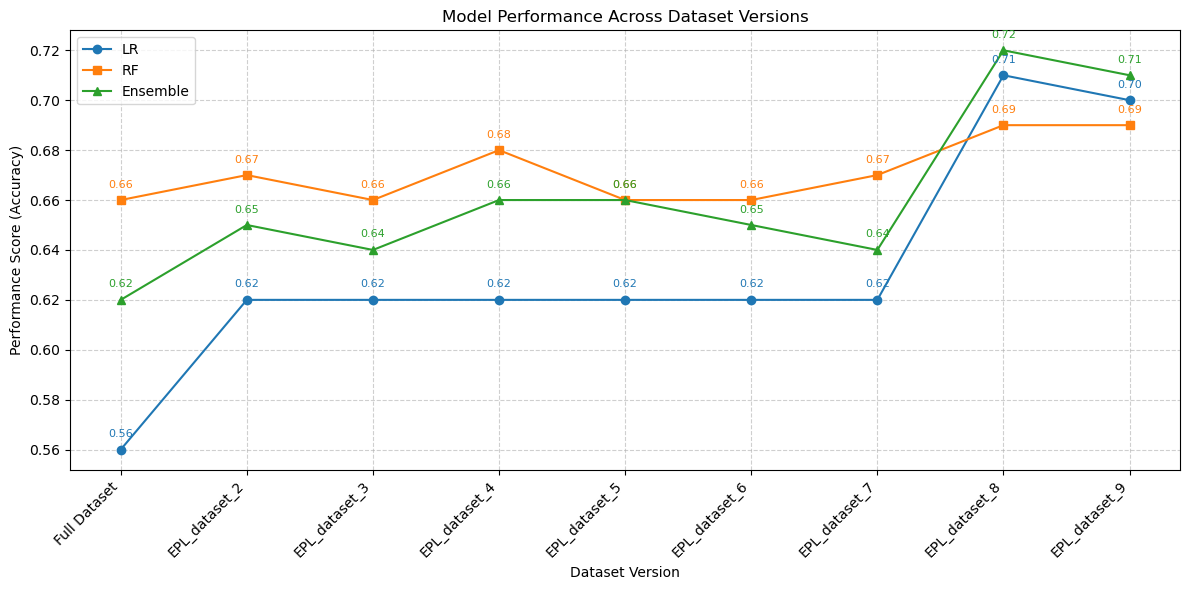

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.makedirs("Diagrams", exist_ok=True)

df = pd.read_csv("Results/Datasets/model_performances_&_datasets.csv")

df_clean = df[['Dataset', 'LR', 'RF', 'Ensemble']].dropna().copy()

df_clean = df_clean[df_clean['Dataset'].str.lower().str.startswith("epl")]

for col in ['LR', 'RF', 'Ensemble']:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

df_clean = df_clean.sort_values(
    by='Dataset',
    key=lambda x: x.str.extract(r'(\d+)')[0].fillna(0).astype(int)
)

df_clean['Label'] = (
    df_clean['Dataset']
)
df_clean.loc[
    df_clean['Dataset'].str.contains("full_dataset_filled", case=False),
    'Label'
] = "Full Dataset"

plt.figure(figsize=(12, 6))
plt.plot(df_clean['Label'], df_clean['LR'],      marker='o', label='LR',      color='C0')
plt.plot(df_clean['Label'], df_clean['RF'],      marker='s', label='RF',      color='C1')
plt.plot(df_clean['Label'], df_clean['Ensemble'],marker='^', label='Ensemble',color='C2')

for i, lbl in enumerate(df_clean['Label']):
    lr = df_clean['LR'].iloc[i]
    rf = df_clean['RF'].iloc[i]
    en = df_clean['Ensemble'].iloc[i]
    # offsets to avoid overlap
    plt.text(lbl, lr + 0.005, f"{lr:.2f}", ha='center', fontsize=8, color='C0')
    plt.text(lbl, rf + 0.005, f"{rf:.2f}", ha='center', fontsize=8, color='C1')
    plt.text(lbl, en + 0.005, f"{en:.2f}", ha='center', fontsize=8, color='C2')

plt.title('Model Performance Across Dataset Versions')
plt.xlabel('Dataset Version')
plt.ylabel('Performance Score (Accuracy)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.savefig("Results/Diagrams/model_performance_chart.png", dpi=300)
plt.show()
